In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from pydrake.all import (
    AddMultibodyPlantSceneGraph,
    DiagramBuilder,
    InverseDynamicsController,
    MeshcatVisualizer,
    MultibodyPlant,
    Parser,
    Simulator,
    StartMeshcat,
)
from manipulation.utils import RenderDiagram
from pydrake.math import RigidTransform

In [3]:
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7001


In [4]:
iiwa_sdf = "package://drake_models/iiwa_description/sdf/iiwa14_no_collision.sdf"

In [5]:
plant = MultibodyPlant(time_step=1e-4)
Parser(plant).AddModelsFromUrl(iiwa_sdf)
plant.WeldFrames(plant.world_frame(), plant.GetFrameByName("iiwa_link_0"))
plant.Finalize()

In [6]:
context = plant.CreateDefaultContext()
print(context)

::_ Context
------------
Time: 0
States:
  1 discrete state groups with
     14 states
       0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 abstract states

Parameters:
  46 numeric parameter groups with
     1 parameters
       0
     1 parameters
       0
     1 parameters
       0
     1 parameters
       0
     1 parameters
       0
     1 parameters
       0
     1 parameters
       0
     0 parameters
       
     1 parameters
       0.0001321
     1 parameters
       160
     1 parameters
       0.0001321
     1 parameters
       160
     1 parameters
       0.0001321
     1 parameters
       160
     1 parameters
       0.0001321
     1 parameters
       160
     1 parameters
       0.0001321
     1 parameters
       100
     1 parameters
       4.54e-05
     1 parameters
       160
     1 parameters
       4.54e-05
     1 parameters
       160
     10 parameters
       nan nan nan nan nan nan nan nan nan nan
     10 parameters
                          5                 -0.1                

In [7]:
builder = DiagramBuilder()
plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=1e-4)

parser = Parser(plant)
parser.SetAutoRenaming(True)
parser.AddModelsFromUrl(iiwa_sdf)
plant.WeldFrames(plant.world_frame(), plant.GetFrameByName("iiwa_link_0"))

visualizer = MeshcatVisualizer.AddToBuilder(builder, scene_graph, meshcat)
diagram = builder.Build()

plant = MultibodyPlant()
plant.EvalBodyPoseInWorld()

print(diagram)

In [8]:
# add box to the scene
bin_urdf_file = "./urdfs/bin.urdf"
bin_urdf = open(bin_urdf_file).read()

poses = [
    RigidTransform(p=[0.5, 0.5, 0]),
    RigidTransform(p=[-0.5, -0.5, 0]),
]

for pose in poses:
    bin_model = parser.AddModels(bin_urdf_file)[0]  
    bin_body = plant.GetFrameByName("bin_body", bin_model) 
    plant.WeldFrames(
        plant.world_frame(), bin_body, pose
    )

In [9]:
plant.Finalize()

In [10]:
model_name = plant.GetModelInstanceName(bin_model)
model = plant.GetModelInstanceByName(model_name)
model

ModelInstanceIndex(4)

In [11]:
context = diagram.CreateDefaultContext()
diagram.ForcedPublish(context)

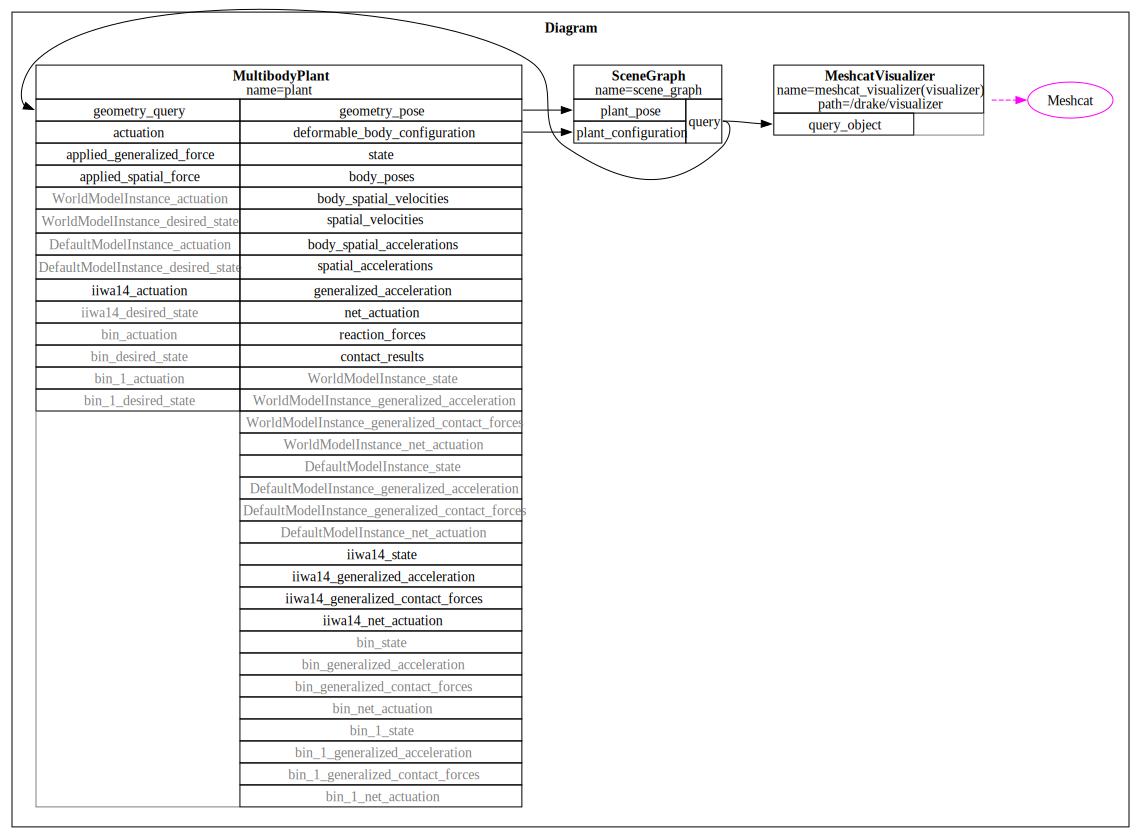

In [12]:
RenderDiagram(diagram)

In [13]:
from manipulation.station import LoadScenario, MakeHardwareStation